- Explicit Error Bounds for Carleman Linearization: https://arxiv.org/abs/1711.02552
- Efficient quantum algorithm for dissipative nonlinear differential equations: https://arxiv.org/pdf/2011.03185.pdf

## Theoretical error bounds

In [167]:
include("carlin.jl")

LoadError: could not open file /home/mforets/Projects/escritoire/2020/Week43/carlin.jl

# Van der pol example

$$
\begin{cases}
x_1' = x_2    \\
x_2' = -x_1 + (1 - x_1^2)x_2    \\
\end{cases}
$$

In [86]:
using SparseArrays

In [87]:
const ω = 1.0
const r = 1.0

F₁ = sparse([1, 2, 2], [2, 1, 2], [1.0, -ω^2, r], 2, 2)
Matrix(F₁)

2×2 Array{Float64,2}:
  0.0  1.0
 -1.0  1.0

In [88]:
F₂ = zeros(2, 4)
Matrix(F₂)

2×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [89]:
F₃ = sparse([2], [2], [-r], 2, 8);
Matrix(F₃)

2×8 Array{Float64,2}:
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [90]:
x₀ = [0.0, 0.5]

2-element Array{Float64,1}:
 0.0
 0.5

## Reduction to the quadratic case

We are interested in bringing the van der pol system to the canonical quadratic system,

$$
\tilde{x}' = \tilde{F}_1 \tilde{x} + \tilde{F}_2 \tilde{x}^{[2]}
$$

$$
\begin{cases}
x_1' = x_2    \\
x_2' = -x_1 + (1 - x_1^2)x_2    \\
\end{cases}
$$

Let $\tilde{x}_1 = x_1$, $\tilde{x}_2 = x_2$, $\tilde{x}_3 = x_1^2$.  

$$
\begin{cases}
\tilde{x}_1' = \tilde{x}_2    \\
\tilde{x}_2' = -\tilde{x}_1 + (1 - \tilde{x}_3)\tilde{x}_2 \\
\tilde{x}_3' = 2\tilde{x}_1\tilde{x}_2 \\
\end{cases}
$$

Hence

$$
\tilde{F}_1 := \begin{pmatrix} 0 &1 &0 \\ -1& 1& 0 \\ 0& 0& 0 \end{pmatrix}
$$

Recall that $\tilde{x}^{[2]} := \tilde{x} \otimes \tilde{x}$, hence

$$
\tilde{x} \otimes \tilde{x} = \begin{pmatrix} \tilde{x}_1 \\ \tilde{x}_2 \\ \tilde{x}_3 \end{pmatrix} \otimes \begin{pmatrix} \tilde{x}_1 \\ \tilde{x}_2 \\ \tilde{x}_3 \end{pmatrix} = \begin{pmatrix} \tilde{x}_1^2 \\ \tilde{x}_1 \tilde{x}_2 \\ \tilde{x}_1 \tilde{x}_3  \\ \tilde{x}_2\tilde{x}_1 \\ \tilde{x}_2^2 \\ \tilde{x}_2\tilde{x}_3 \\ \tilde{x}_1\tilde{x}_3 \\ \tilde{x}_2 \tilde{x}_3 \\ \tilde{x}_3^2 \end{pmatrix} 
$$

$$
\tilde{F}_2 := \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 \\ 
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0\end{pmatrix}
$$

In [91]:
F1 = sparse([1, 2, 2], [2, 1, 2], [1.0, -1, 1], 3, 3)
Matrix(F1)

3×3 Array{Float64,2}:
  0.0  1.0  0.0
 -1.0  1.0  0.0
  0.0  0.0  0.0

In [92]:
F2 = sparse([2, 3], [6, 2], [-1.0, 2.0], 3, 9)
Matrix(F2)

3×9 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  -1.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0

In [93]:
n = size(F1, 1)
size(F2) == (n, n^2)

true

In [94]:
Id = sparse(Matrix(1.0I, n, n));

In [166]:
n

3

In [96]:
using Kronecker

@time begin
A11 = sparse(F1)
A12 = sparse(F2)
A13 = sparse(zeros(n, n^3))
A14 = sparse(zeros(n, n^4))

A21 = sparse(zeros(n^2, n))
A22 = sparse(collect(F1 ⊗ Id + Id ⊗ F1));
A23 = sparse(collect(F2 ⊗ Id + Id ⊗ F2));
A24 = sparse(zeros(n^2, n^4))

A31 = sparse(zeros(n^3, n))
A32 = sparse(zeros(n^3, n^2))
A33 = sparse(collect(F1 ⊗ Id ⊗ Id + Id ⊗ F1 ⊗ Id + Id ⊗ Id ⊗ F1));
A34 = sparse(collect(F2 ⊗ Id ⊗ Id + Id ⊗ F2 ⊗ Id + Id ⊗ Id ⊗ F2));

A41 = sparse(zeros(n^4, n))
A42 = sparse(zeros(n^4, n^2))
A43 = sparse(zeros(n^4, n^3))
A44 = sparse(collect(F1 ⊗ Id ⊗ Id ⊗ Id + Id ⊗ F1 ⊗ Id ⊗ Id + Id ⊗ Id ⊗ F1 ⊗ Id + Id ⊗ Id ⊗ Id ⊗ F1));
end

  0.696933 seconds (2.22 M allocations: 106.198 MiB)


81×81 SparseMatrixCSC{Float64,Int64} with 281 stored entries:
  [2 ,  1]  =  -1.0
  [4 ,  1]  =  -1.0
  [10,  1]  =  -1.0
  [28,  1]  =  -1.0
  [1 ,  2]  =  1.0
  [2 ,  2]  =  1.0
  [5 ,  2]  =  -1.0
  [11,  2]  =  -1.0
  [29,  2]  =  -1.0
  [6 ,  3]  =  -1.0
  [12,  3]  =  -1.0
  [30,  3]  =  -1.0
  ⋮
  [77, 74]  =  -1.0
  [78, 75]  =  -1.0
  [73, 76]  =  1.0
  [76, 76]  =  1.0
  [77, 76]  =  -1.0
  [74, 77]  =  1.0
  [76, 77]  =  1.0
  [77, 77]  =  2.0
  [75, 78]  =  1.0
  [78, 78]  =  1.0
  [80, 79]  =  -1.0
  [79, 80]  =  1.0
  [80, 80]  =  1.0

In [97]:
A1 = [A11 A12 A13 A14];
A2 = [A21 A22 A23 A24];
A3 = [A31 A32 A33 A34];
A4 = [A41 A42 A43 A44];

In [98]:
size(A1)

(3, 120)

In [99]:
size(A2)

(9, 120)

In [100]:
size(A3)

(27, 120)

In [101]:
size(A4)

(81, 120)

In [102]:
A_N4 = [A1; A2; A3; A4]

120×120 SparseMatrixCSC{Float64,Int64} with 442 stored entries:
  [2  ,   1]  =  -1.0
  [1  ,   2]  =  1.0
  [2  ,   2]  =  1.0
  [5  ,   4]  =  -1.0
  [7  ,   4]  =  -1.0
  [3  ,   5]  =  2.0
  [4  ,   5]  =  1.0
  [5  ,   5]  =  1.0
  [8  ,   5]  =  -1.0
  [9  ,   6]  =  -1.0
  [4  ,   7]  =  1.0
  [7  ,   7]  =  1.0
  ⋮
  [117, 114]  =  -1.0
  [112, 115]  =  1.0
  [115, 115]  =  1.0
  [116, 115]  =  -1.0
  [113, 116]  =  1.0
  [115, 116]  =  1.0
  [116, 116]  =  2.0
  [38 , 117]  =  -1.0
  [114, 117]  =  1.0
  [117, 117]  =  1.0
  [119, 118]  =  -1.0
  [118, 119]  =  1.0
  [119, 119]  =  1.0

In [103]:
Φ = exp(Matrix(A_N4));

In [104]:
using LinearAlgebra

In [105]:
Φk = Φ * Φ * Φ * Φ
sparse(Φk[1:2, :])

2×120 SparseMatrixCSC{Float64,Int64} with 80 stored entries:
  [1,  1]  =  -5.65598
  [2,  1]  =  2.70424
  [1,  2]  =  -2.70424
  [2,  2]  =  -8.36022
  [1,  6]  =  16.8854
  [2,  6]  =  3.03424
  [1,  9]  =  -3.03424
  [2,  9]  =  16.5554
  [1, 13]  =  113.846
  [2, 13]  =  105.07
  [1, 14]  =  23.0713
  [2, 14]  =  -14.1111
  ⋮
  [2, 82]  =  561.149
  [1, 83]  =  93.6424
  [2, 83]  =  284.939
  [1, 85]  =  54.2989
  [2, 85]  =  -154.908
  [1, 86]  =  -42.1081
  [2, 86]  =  -337.76
  [1, 88]  =  -236.798
  [2, 88]  =  94.2493
  [1, 89]  =  182.499
  [2, 89]  =  60.6583
  [1, 93]  =  -41.2657
  [2, 93]  =  -28.7094

In [117]:
ε(t, N) = error_bound(x̃₀, F1, F2, t; p=Inf, N=N)

ε (generic function with 1 method)

In [118]:
x̃₀ = vcat(x₀, kron(x₀, x₀))
convergence_radius(x̃₀, F1, F2)

0.5493061443340549

In [119]:
using Plots

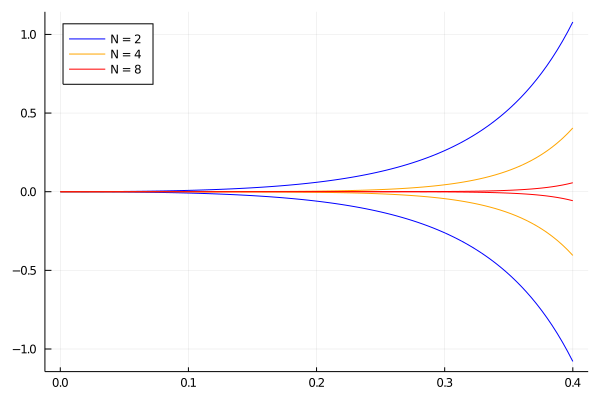

In [120]:
dom = range(0, 0.4, length=100)

plot(dom, ε.(dom, 2), lab="N = 2", c=:blue, legend=:topleft)
plot!(dom, ε.(dom, 4), lab="N = 4", c=:orange)
plot!(dom, ε.(dom, 8), lab="N = 8", c=:red)

plot!(dom, -ε.(dom, 2), lab="", c=:blue)
plot!(dom, -ε.(dom, 4), lab="", c=:orange)
plot!(dom, -ε.(dom, 8), lab="", c=:red)

## Computation of the linearized system

In [122]:
#=
_kronecker(M, i) = i == 1 ? M : kronecker(M, i)

# TODO make sparse
function transfer_matrix(i, Fⱼ)
    n = size(Fⱼ, 1)
    Id = I(n)
    if i == 1
        return Fⱼ
    end
    
    A = Fⱼ ⊗ _kronecker(Id, i-1)
    for ν in 2:i-1
        A += _kronecker(Id, ν-1) ⊗ Fⱼ ⊗ _kronecker(Id, i-ν)
    end
    A += _kronecker(Id, i-1) ⊗ Fⱼ

    return A
end

@time A = transfer_matrix(5, F̃₁);
F̃₁⊗kronecker(I(3), 2) + F̃₁⊗kronecker(I(3), 2);
=#

Carleman embedding with N = 2

In [125]:
# -------------------
# up to order N = 2
# -------------------
#=
A¹₁ = transfer_matrix(1, F̃₁)
A¹₂ = transfer_matrix(1, F̃₂)

# i = 2, i + j - 1 = 2 ==> j = 1 
A²₂ = transfer_matrix(2, F̃₁) |> sparse;

Z = zeros(size(A²₂, 1), size(A¹₁, 2))
Ã = [A¹₁  A¹₂;
     Z    A²₂] ;

x̃₀ᵉ = vcat(x̃₀, kron(x̃₀, x̃₀)) |> sparse

Δ = convergence_radius(x̃₀, F̃₁, F̃₂) * 0.1

using LinearAlgebra, SparseArrays

eigvals(Matrix(Ã))

prob = @ivp(x' = Ã*x, x(0) ∈ x̃₀ᵉ);
sol = solve(prob, tspan=(0.0, Δ));


using ReachabilityAnalysis: ⊕


LazySets.set_ztol(Float64, 1e-12)

ε(tspan(sol[end]), 2)

solerr = [ReachSet(set(R) ⊕ BallInf(zeros(dim(R)), ε(sup(tspan(R)), 2)), tspan(R)) for R in sol];

using Plots

plot(sol[1:10], vars=(1, 2))
plot!(solerr[1:10], vars=(1, 2))

#plot(sol, vars=(1, 2))
plot!(solerr, vars=(1, 2))

=#

## Set-based Kronecker power

In [126]:
using Revise, LazySets, TaylorModels, ReachabilityAnalysis, Test

In [127]:
H = Hyperrectangle(ones(2), [0.2, 0.4])

b = convert(TaylorModelReachSet, H, orderQ=4, orderT=4)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  1.0 + 0.2 x₁ + [0, 0],   1.0 + 0.4 x₂ + [0, 0]], [0, 0])

In [128]:
polynomial(b)

2-element Array{Taylor1{TaylorN{Float64}},1}:
   1.0 + 0.2 x₁ + 𝒪(‖x‖⁹) + 𝒪(t⁵)
   1.0 + 0.4 x₂ + 𝒪(‖x‖⁹) + 𝒪(t⁵)

In [129]:
@time X = kronecker(b, 2);

  0.004382 seconds (16.50 k allocations: 1.780 MiB)


In [130]:
Φ

120×120 Array{Float64,2}:
  0.343028  1.45022  0.0   0.0       …  0.0       0.0       0.0      0.0
 -1.45022   1.79325  0.0   0.0          0.0       0.0       0.0      0.0
  0.0       0.0      1.0  -0.882332     0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.117668     0.0       0.0       0.0      0.0
  0.0       0.0      0.0  -0.497467     0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0       …  0.0       0.0       0.0      0.0
  0.0       0.0      0.0  -0.497467     0.0       0.0       0.0      0.0
  0.0       0.0      0.0   2.10315      0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0       …  0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.0      0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.0      0.0
  ⋮                      

In [137]:
#=
H4 = rand(Hyperrectangle, dim=8)
b = convert(TaylorModelReachSet, H4)
@time kronecker(b, 4);
  9.762252 seconds (26.10 M allocations: 18.601 GiB, 17.07% gc time)

=#

In [156]:
H = Hyperrectangle(ones(2), [0.2, 0.4])
b = convert(TaylorModelReachSet, H, orderQ=4, orderT=2)
X = kronecker(b, 2)
#Φ * b
polynomial(X)

4-element Array{Taylor1{TaylorN{Float64}},1}:
              1.0 + 0.4 x₁ + 0.04000000000000001 x₁² + 𝒪(‖x‖⁹) + 𝒪(t³)
   1.0 + 0.2 x₁ + 0.4 x₂ + 0.08000000000000002 x₁ x₂ + 𝒪(‖x‖⁹) + 𝒪(t³)
   1.0 + 0.2 x₁ + 0.4 x₂ + 0.08000000000000002 x₁ x₂ + 𝒪(‖x‖⁹) + 𝒪(t³)
              1.0 + 0.8 x₂ + 0.16000000000000003 x₂² + 𝒪(‖x‖⁹) + 𝒪(t³)

In [157]:
# [X, X ⊗ X, X ⊗ X ⊗ X, ... , X]
function kronecker_stack(X::TaylorModelReachSet, order::Integer)
    out = [kronecker(X, pow) for pow in 1:order]
    Y = reduce(vcat, set.(out))
    return TaylorModelReachSet(Y, tspan(X))
end

kronecker_stack (generic function with 1 method)

In [159]:
X4 = kronecker_stack(b, 4);

In [164]:
set(X4)

30-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
                                                                                                                                                                                     1.0 + 0.2 x₁ + [0, 0]
                                                                                                                                                                                     1.0 + 0.4 x₂ + [0, 0]
                                                                                                                                                           1.0 + 0.4 x₁ + 0.04000000000000001 x₁² + [0, 0]
                                                                                                                                                1.0 + 0.2 x₁ + 0.4 x₂ + 0.08000000000000002 x₁ x₂ + [0, 0]
                                                                                                                                